In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.figsize'] = [13, 5]

In [202]:
df = pd.read_csv('twitter.csv')
users = ['RozeckaPL', 'GoTracz', 'martalempart', 'MichalakJerzy', 'KatarzynaObara', 'SutrykJacek']
since_date = '2017-01-01'
until_date = '2018-10-17'

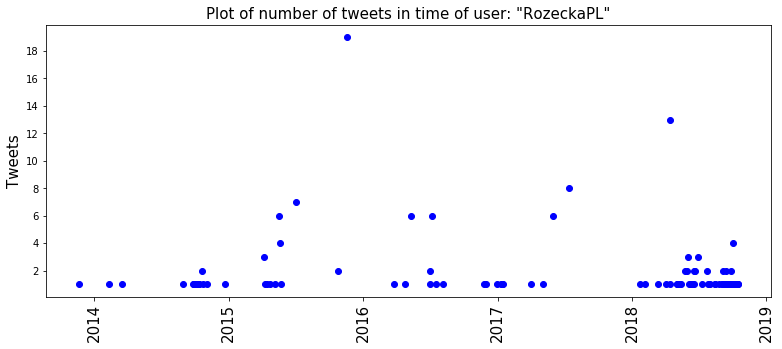

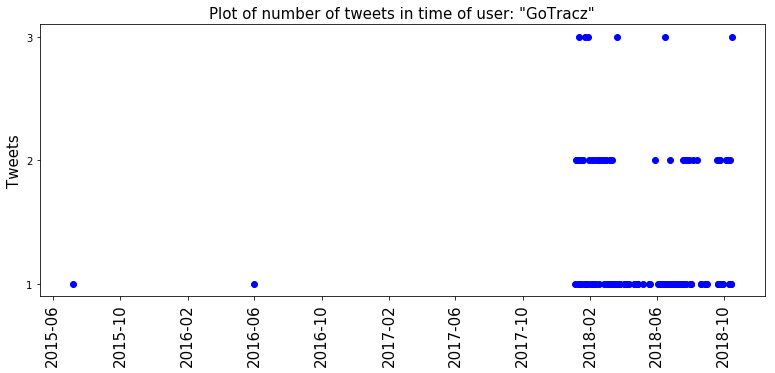

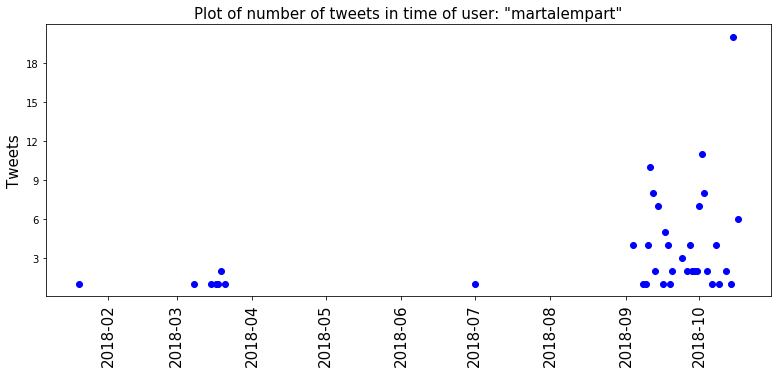

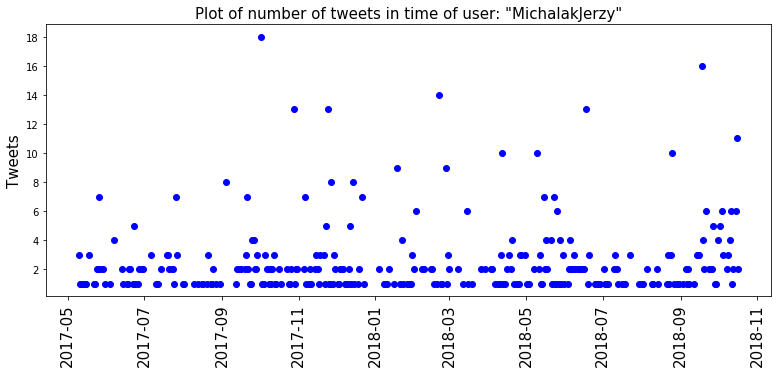

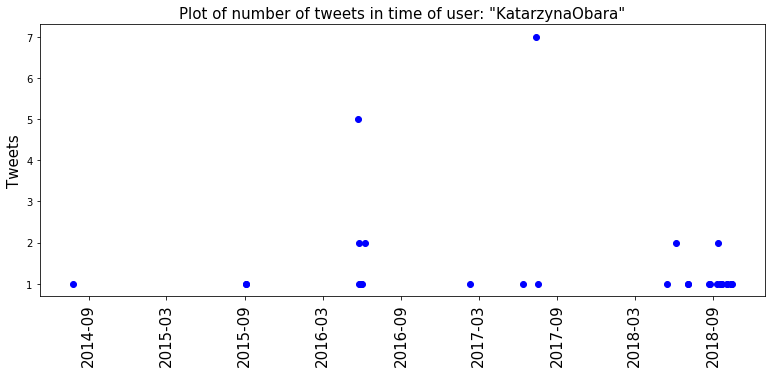

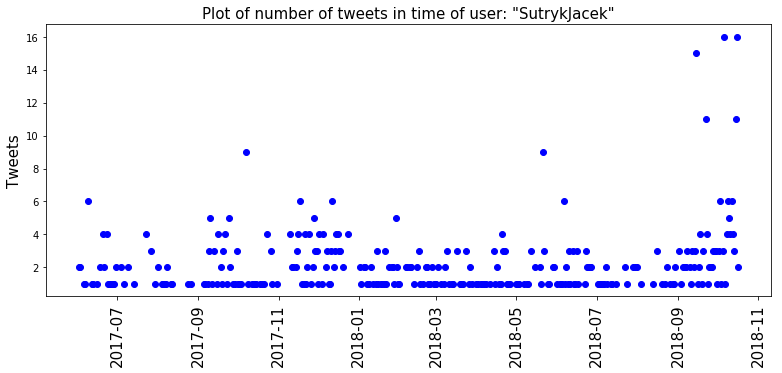

In [216]:
tweets = df.loc[df['username'] == df['user_rt']]
retweets = df.loc[df['username'] != df['user_rt']]


for user in users:
    user_tweets = df.loc[df['username'] == user]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets = user_tweets.groupby(['date'])['tweet'].count()
    dates = []
    values = []
    
    
    for i, v in user_tweets.items():
        dates.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
        values.append(v)
        
    fig, ax = plt.subplots()
    ax.set_ylabel('Tweets', fontsize=15)
    ax.set_title("Plot of number of tweets in time of user: \"{}\"".format(user), fontsize=15)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(dates, values, 'bo')
    ax.xaxis.set_tick_params(rotation=90, labelsize=15)
    plt.show()
    
